In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

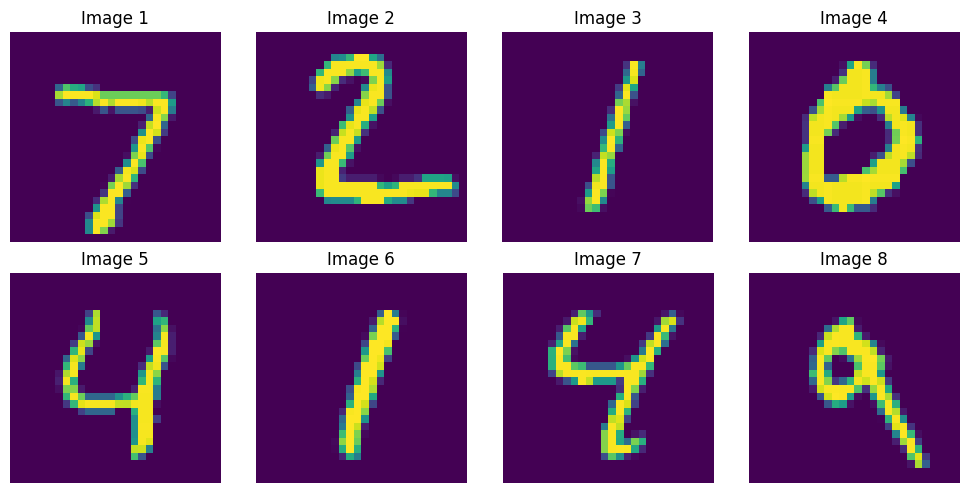

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import struct

# Path to the MNIST images file
mnist_file = "/Users/tejasmacipad/Desktop/Projects/DataScience/Datascience-Project/MNIST/t10k-images.idx3-ubyte"

# Function to load IDX3 file
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))  # Read header
        image_data = np.frombuffer(f.read(), dtype=np.uint8)  # Read rest as bytes
        images = image_data.reshape(num_images, rows, cols)  # Reshape to 3D array
    return images

# Load images
images = load_mnist_images(mnist_file)

# Display first 8 images
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])  # MNIST images are grayscale
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [3]:
print(len(images))

10000


Shape of images: (10000, 784)


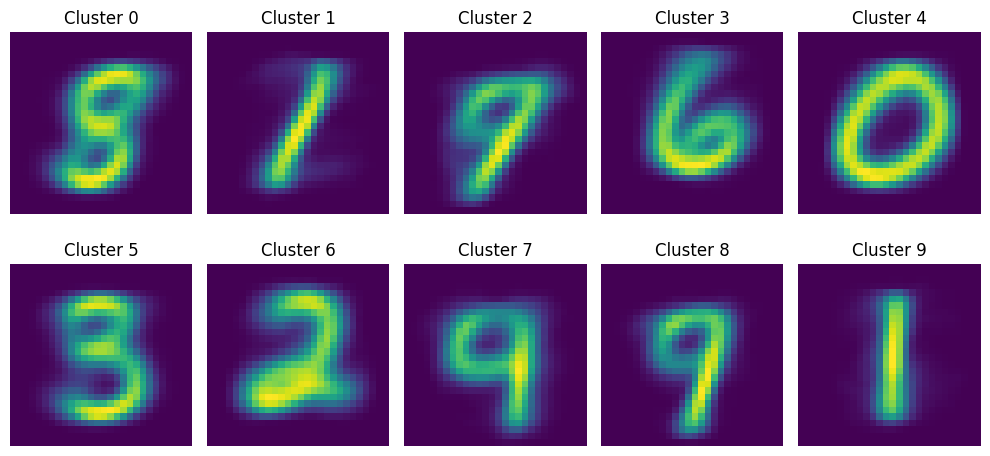

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import struct
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Path to MNIST images file
mnist_file = "/Users/tejasmacipad/Desktop/Projects/DataScience/Datascience-Project/MNIST/t10k-images.idx3-ubyte"

# Function to load MNIST images
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))  # Read header
        image_data = np.frombuffer(f.read(), dtype=np.uint8)  # Read rest as bytes
        images = image_data.reshape(num_images, rows * cols)  # Flatten images (28x28 → 784)
    return images

# Load MNIST images
images = load_mnist_images(mnist_file)

# Ensure images are 2D: (num_samples, 784)
print("Shape of images:", images.shape)  # Should be (10000, 784)

# Step 1: Apply K-Means clustering
num_clusters = 10  # Assuming 10 clusters for 10 digits
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(images)  # Now it works!

# Step 2: Fit Gaussian Mixture Models (GMM) on each cluster
gmms = []
for cluster_id in range(num_clusters):
    cluster_data = images[cluster_labels == cluster_id]  # Extract images from this cluster
    if len(cluster_data) == 0:
        print(f"Skipping empty cluster {cluster_id}")
        continue
    gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
    gmm.fit(cluster_data)  # Fit Gaussian model
    gmms.append(gmm)

# Step 3: Visualize Cluster Centers
plt.figure(figsize=(10, 5))
for i in range(num_clusters):
    plt.subplot(2, 5, i + 1)=
    plt.imshow(kmeans.cluster_centers_[i].reshape(28, 28))
    plt.axis('off')
    plt.title(f"Cluster {i}")

plt.tight_layout()
plt.show()

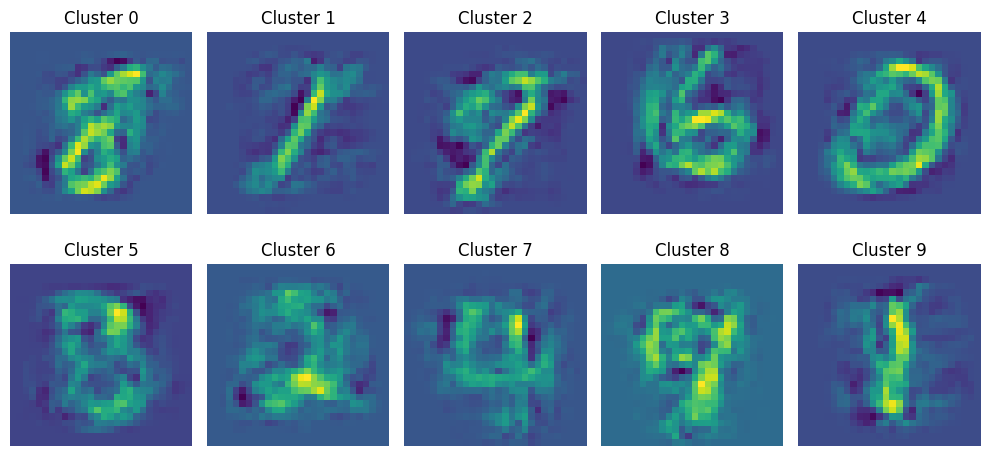

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate and visualize images sampled from the Gaussian models
def visualize_gmm_samples(gmms, num_clusters):
    plt.figure(figsize=(10, 5))
    
    for i, gmm in enumerate(gmms):
        sampled_image, _ = gmm.sample(1)  # Sample one image from GMM
        sampled_image = sampled_image.reshape(28, 28)  # Reshape to original MNIST format
        
        plt.subplot(2, 5, i + 1)
        plt.imshow(sampled_image)
        plt.axis('off')
        plt.title(f"Cluster {i}")

    plt.tight_layout()
    plt.show()

# Call function to visualize
visualize_gmm_samples(gmms, num_clusters)